<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:blue; border:0; color:white' role="tab" aria-controls="home"><center>Acknowledgements</center></h2>

1. I would really like to Thank Kaggle and Riiid to host this competition , applying Ai to Education is really one of the novel ideas.

2. I would like to thank Analytics India Mag , their article over [here](https://analyticsindiamag.com/riiid-announces-100000-kaggle-competition-using-ednet-worlds-largest-education-dataset/) , helped me understand more about domain and Riiid itself .

3. I would also like to thank [Kostiantyn Isaienkov](https://www.kaggle.com/isaienkov) , his EDA kernel [here](https://www.kaggle.com/isaienkov/mechanisms-of-action-moa-prediction-eda)  for mechanisms of action prediction competitions , provided me lot of ideas and also how to best showcase the results.

4. Finally Do Upvote this kernel , if you found it useful and insightful , it will motivate me to produce more kernel relevant to modelling in this competition and also more kernel in future !

<div class="list-group" id="list-tab" role="tablist">
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:blue; border:0; color:white' role="tab" aria-controls="home"><center>Quick navigation</center></h2>

* [1. About RIIID ](#1)
* [2. About Data ](#2)
* [3. About TOEIC Test ](#3)
* [4. Intelligent Tutoring and Knowledge Tracing ](#4)
* [5. EDA OF Train.csv ](#5)
* [6. EDA OF Questions.csv ](#6)
* [7. EDA OF Questions.csv and Train.csv Combined ](#7)
* [8. Example of Test Data ](#8)
* [9. To be continued Upcoming ](#9)


  


# Information About The Competition :

<a id="1"></a>
<h2 style='background:blue; border:0; color:white'><center>1. About Riiid</center><h2>


1. Riid is an AI Company that provides Ai based tutoring solutions to their customers
2. From the company Website itself Riiid stands for Removing Barriers in "Inefficieny" , "Inequality" , "Inconvenience"

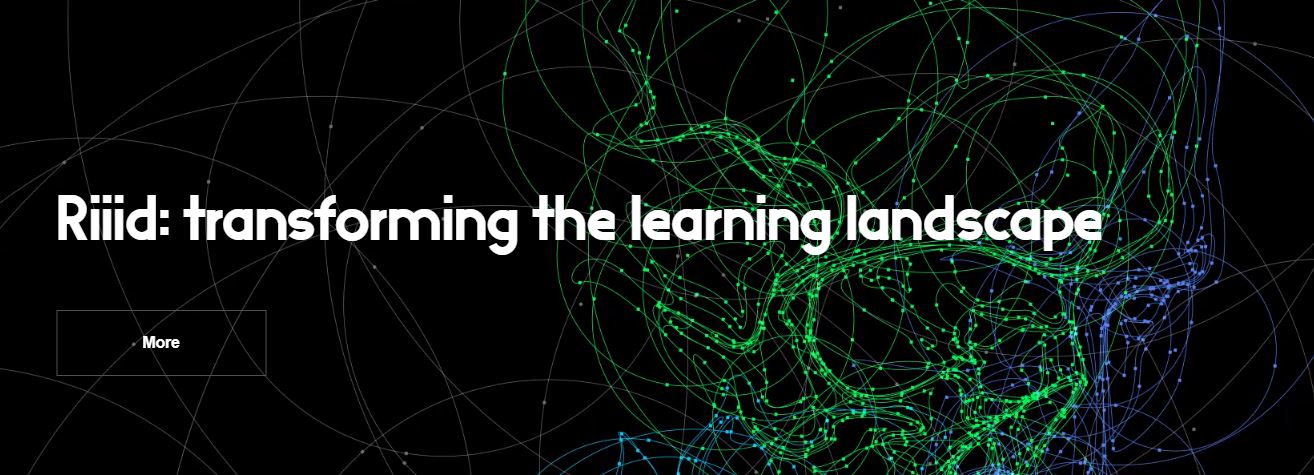

<a id="2"></a>


<a id="2"></a>

<h2 style='background:blue; border:0; color:white'><center>2. About Data</center><h2>


1. Riiid Offers Santa which is Mobile Based Test Preparation Application for Test of English for International Communication aka TOEIC.
2. Using Data generated from Santa Application by user interactions , Riiid provides personalized study plans in real time to the users to optimize their learning potential.

<a id="3"></a>

<h2 style='background:blue; border:0; color:white'><center>3. About TOEIC Test</center><h2>


1. TOEIC is a Test of 120 minutes , It consists of 2 Sections .
2. TOEIC has multiple choice question format in which we have to mark answers in answer sheet .
3. It consists of Reading Section and Listening Sections .
4. Each Section has multiple parts in itself which assess different learning capabilities of student.

Here is an Example of Sample question Taken From Part 1 of Listening Section . In part 1 , four statements about an image is spoken(not printed) and of this four statements we have to select one statement which best describes the image.

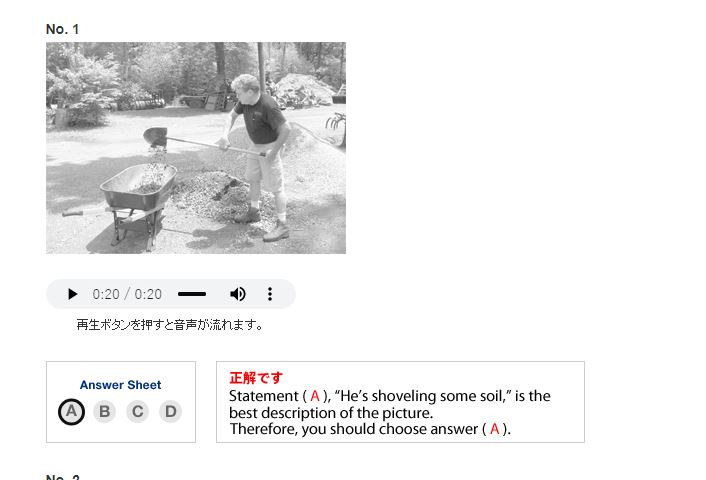

In Above Question 4 statements were spoken only once and out of that one was corrected which has been marked

Let us see one more example of a question from Part 5 of Reading Section , which involves selecting best answer from 4 choices given to appropriately complete the sentence .

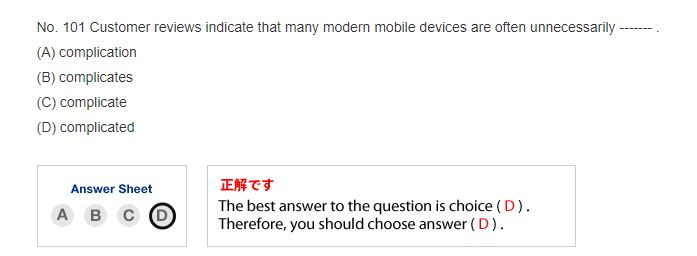

You can Read more about TOEIC [here](https://www.iibc-global.org/english/toeic/test/lr/about/format.html) , but the key takeaway is that responses to an answer will be 4 choices , we will see this now as we progress in EDA . 

<a id="4"></a>

<h2 style='background:blue; border:0; color:white'><center>4. Intelligent Tutoring and Knowledge Tracing </center><h2>


## 1. Intelligent Tutoring Systems(ITS)
1. Intelligent tutoring is a computer system , that aims to provide immediate and customized feedback to learners.
2. ITS are used extensively in formal and education settings.
3. Some Examples of ITS are : Practical Algebra Tutor(PAT) used to teach Algebra to students developed by  Pittsburgh Advanced Cognitive Tutor Center at Carnegie Mellon University,  SQL Tutor developed by ICTG at University of Canterrburry New Zealand , SmartTutor developed to support needs of Adults for continuing Education.

## 2. Knowledge Tracing
1. A Knowledge Tracing algorithm is used in many intelligent tutoring applications.
2. Bayesian Knowledge Tracing Algorithm is used in many intelligent tutoring systems to model each learner's mastery of Knowledge being tutored.
3. Bayesian Knowledge Tracing Assumes student Knowledge being represented as set of binary variables , one for each skill , where each skill is being mastered or not (More Informally for our Task Reading and Listening are two skills which will be assessed and hence they can be represented by Binary Variable) Observations in Bayesian Knowledge Tracing are also Binary (For our example it would be whether student got an answer correct or incorrect)

For more details about this topic , please refer the Youtube video given below , it explains everything right from knowledge tracing and also Bayesian Knowledge Tracing

In [ ]:
## Youtube Video To be added ! 
import warnings
from IPython.display import YouTubeVideo
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from IPython.display import HTML
from IPython.display import YouTubeVideo

YouTubeVideo('cjCwpP3cUpg', width=800, height=300)

# Exploratory Data Analysis 

Let's now dive into EDA , after some domain knowledge and insights into competition and problem we are going to solve

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from IPython.display import display
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import time
import os
import matplotlib.pyplot as plt
import matplotlib_venn as venn
sns.set()
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="5"></a>
<h2 style='background:blue; border:0; color:white'><center>5. EDA of Train.csv</center><h2>


In [ ]:
print("Loading Train Data ....")
df_train = pd.read_csv("../input/riiid-test-answer-prediction/train.csv" , nrows = 10**6)
print("Train Data Info")
print("***************************")
print(df_train.info())

There appears some null objects in "prior_question_elapsed_time" and "prior_question_had_explanation" columns lets check their count !

In [ ]:
print("Number of Null Objects in Elapsed Time Column are : ",df_train.prior_question_elapsed_time.isna().sum())
print("Number of Null Objects in Had Explanation Column are : ",df_train.prior_question_had_explanation.isna().sum())

Lets peek into train dataframe

In [ ]:
df_train.head()

Now we will evaluate Number of Unique Users in our train dataframe , remember that a user can have multiple interaction , as he can answer multiple questions and also watch video lectures in between . 

In [ ]:
unique_users_list = df_train.user_id.unique().tolist()
print("Number of Unique Users are :" , len(unique_users_list))
print("{:>20}: {:>8}".format('Percentage of Unique Users are',(len(unique_users_list)/(df_train.shape[0])) *100))

Lets now plot bar plot , for users distribution as per content_id and understand how many users are watching lecture and how many were answering question , lets see which is dominating content type id

In [ ]:
df_users_content_group = df_train.groupby(['content_type_id'])['user_id'].count().reset_index()
df_users_content_group.columns = ['content_type_id' , 'count']
fig = px.bar(
    df_users_content_group, 
    x='content_type_id', 
    y="count", 
    color = "content_type_id",
    orientation='v', 
    title='User Counts based on Content_type_id', 
    width=500,
    height=500
)

fig.show()

We can see that Number of Users who were answering questions , dominate number of users who were watching the lectures.

Now lets see % age of unique content in our dataset

In [ ]:
unique_content_list = df_train.content_id.unique().tolist()
print("Number of Unique Conents are :" , len(unique_content_list))
#print(%.3f"Percentage of Unique Questions are : " , (len(unique_questions_list))/(df_train.shape[0]))
# Let's check our memory usage
print("{:>20}: {:>8}".format('Percentage of Unique Content are',len(unique_content_list)/(df_train.shape[0]) *100))

In [ ]:
## Lets Now plot top content like top 10 content and their distribution based on occurence
df_top_content = df_train.groupby('content_id')['user_id'].count().reset_index().sort_values(by ='user_id', ascending=False)[:5]
df_top_content['content_id'] = df_top_content['content_id'].astype('category')
df_top_content.columns = ['content_id' , 'count']
fig = px.bar(
    df_top_content, 
    x='content_id', 
    y="count", 
    orientation='v', 
    title='Top 5 Content Ids Having most user', 
    width=800,
    height=800
)

fig.show()

#### Lets Now Do Same But Only for Top Questions !

In [ ]:
df_ques_only = df_train.loc[df_train['content_type_id'] == 0]
df_top_ques = df_ques_only.groupby('content_id')['user_id'].count().reset_index().sort_values(by ='user_id', ascending=False)[:5]
df_top_ques['content_id'] = df_top_ques['content_id'].astype('category')
df_top_ques.columns = ['content_id' , 'count']
fig = px.bar(
    df_top_ques, 
    x='content_id', 
    y="count", 
    orientation='v', 
    title='Top 5 Question Ids Having most user', 
    width=800,
    height=800
)

fig.show()

Lets now see what percentage of users correctly answered the questions and also their distribution

In [ ]:
correct_answer_stu = df_train.loc[df_train['answered_correctly'] == 1 ].shape[0]
print("Number of Correct Answer Students  are :" ,correct_answer_stu)
print("{:>20}: {:>8}".format('Percentage of Correct Answers',(correct_answer_stu)/(df_train.shape[0]) *100))

In [ ]:
df_ques_only = df_train.loc[df_train['content_type_id'] == 0]
df_correct_ans = df_ques_only.groupby('answered_correctly')['user_id'].count().reset_index().sort_values(by ='user_id', ascending=False)
df_correct_ans
df_correct_ans.columns = ['answered_correctly' , 'count']
fig = px.bar(
    df_correct_ans, 
    x='answered_correctly', 
    y="count", 
    orientation='v', 
    title='User Counts Based on Correctly answer question', 
    width=500,
    height=500
)

fig.show()

Now Let Us Plot a Venn Diagram to show how users watching videos and users answering questions are related

In [ ]:
df_questions_user = df_train.loc[df_train['content_type_id'] == 0 ]
df_lectures_user = df_train.loc[df_train['content_type_id'] == 1 ]
df_questions_user_id_set = set(df_questions_user['user_id'])
df_lectures_user_id_set = set(df_lectures_user['user_id'])
venn.venn2([df_questions_user_id_set,df_lectures_user_id_set],set_labels=('Question','Lectures'))

We can see that set of Users that are watching lectures are subset of set of users answering questions , which means there can be users who only answers questions and not prefer watching lectures if it were the case that all users watch lectures and also answer questions we would have gotten almost overlapping set!

<b> Lets see Sample Statistics of an student who has user_id = 115 </b>

In [ ]:
df_sample_stu = df_train.loc[df_train['user_id'] == 115]
unique_questions_list = df_sample_stu.content_id.unique().tolist()
print("Number of Unique Questions by Student 115 are :" , len(unique_questions_list))
#print(%.3f"Percentage of Unique Questions are : " , (len(unique_questions_list))/(df_train.shape[0]))
# Let's check our memory usage
print("{:>20}: {:>8}".format('Percentage of Unique Questions Seen by 115 are',len(unique_questions_list)/(df_sample_stu.shape[0]) *100))
correct_answer_stu = df_sample_stu.loc[df_sample_stu['answered_correctly'] == 1 ].shape[0]
print("Number of Correct Answer by 115   are :" ,correct_answer_stu)
print("{:>20}: {:>8}".format('Percentage of Correct Answers by 115 are',(correct_answer_stu)/(df_sample_stu.shape[0]) *100))

<a id="6"></a>
<h2 style='background:blue; border:0; color:white'><center>6. EDA of Questions.csv</center><h2>



In [ ]:
df_ques = pd.read_csv('../input/riiid-test-answer-prediction/questions.csv')
df_ques.head()

In [ ]:
print("Number of Unique Questions are " , df_ques.shape[0])


As per the data description given [here](https://www.kaggle.com/c/riiid-test-answer-prediction/data) if you notice "example_test_rows.csv" , It says clearly " Some questions will appear in the hidden test set that have NOT been presented in the train set, emulating the challenge of quickly adapting to modeling newly introduced questions" , However their Metadata is still with us in questions.csv , This can come useful for validation set !

In [ ]:
train_ques_set = set(df_train['content_id'])
all_ques_set = set(df_ques['question_id'])

not_in_train_ques = list(all_ques_set.difference(train_ques_set))
print('{}:{}'.format("The Number of Questions Not in Train Set Are" , len(not_in_train_ques)))

Lets see how many parts are there to which a question can belong !

In [ ]:
df_ques.head()

In [ ]:
df_ques_bundle = df_ques.groupby('part')['question_id'].count().reset_index().sort_values(by ='question_id', ascending=False)
df_ques_bundle.columns = ['part' ,'count']
df_ques_bundle.plot.bar(x = 'part' , y = 'count', title = "Number of Questions by Parts")

We can see that part 5 has the most number of questions , part 2 ,3 and 4 have almost similar Number of questions , part 1 has least Number of questions

Let's see Tags of Questions Now !

In [ ]:
# Making List of Unique Tags !
tag_list = []
for i in df_ques.index:
    temp = str(df_ques['tags'][i]).split(" ")
    for tag in temp:
        if tag not in tag_list:
            tag_list.append(tag)


In [ ]:
## Peaking Over Few Tags 
tag_list[:10]

Lets Now See which Tags Have Minimum and Maximum Number of appearance and also lets try to plot some top few tags having highest occurences!

In [ ]:
tag_dict = {key:0 for key in tag_list}
for i in df_ques.index:
    temp = str(df_ques['tags'][i]).split(" ")
    for tag in temp:
        tag_dict[tag] +=1


In [ ]:
# sorting dict 
sorted_tag_dict = {k: v for k, v in sorted(tag_dict.items(), key=lambda item: item[1] , reverse=True)}


In [ ]:
## Lets Now Get Minimum and Maximum appearance of Tags

print("Maximum Appearance of a Tag is :" , max(sorted_tag_dict.values()))
print("Minimum Appearance of a Tag is :" , min(sorted_tag_dict.values()))
print("Tag Having Maximum Appearance is :" , list(sorted_tag_dict.keys())[0] )
print("Tag Having Minimum Appearance is :" , list(sorted_tag_dict.keys())[-1] )

In [ ]:
# Lets Take Top 10 Tags and plot their occurences
import itertools
top_10_tags = dict(itertools.islice(sorted_tag_dict.items(), 10))
df_top_10 = pd.DataFrame(list(top_10_tags.items()) , columns=['Tag' , 'appearances']) 
import seaborn as sns
ax = sns.barplot(x="Tag", y="appearances", data=df_top_10)


In [ ]:
#sorted_tag_dict.keys()[0]
list(sorted_tag_dict.keys())[0] 

Let us see appearance of Tags as per correct and incorrect answer wise , let us analyse top 10 tags , we have to predict whether given answer is correct or  not , let us see if tags have some trends or not !

<a id="7"></a>
<h2 style='background:blue; border:0; color:white'><center>7. EDA of Train and Questions.csv Combined</center><h2>


In [ ]:
df_train = df_train.rename(columns = {'content_id':'question_id'})
df_comb = df_train.merge(df_ques , on = 'question_id' , how = 'left')
df_comb.head()

In [ ]:
df_comb = df_comb.loc[df_comb['content_type_id'] == 0 ] # Take only questions Data 
df_correct_answer_data = df_comb.loc[df_comb['answered_correctly'] == 1]
df_incorrect_answer_data = df_comb.loc[df_comb['answered_correctly'] == 0]

In [ ]:
# Making List of Unique Tags !
correct_answer_tag_list = []
for i in df_correct_answer_data.index:
    temp = str(df_correct_answer_data['tags'][i]).split(" ")
    for tag in temp:
        if tag not in correct_answer_tag_list:
            correct_answer_tag_list.append(tag)


In [ ]:
# Making List of Unique Tags !
incorrect_answer_tag_list = []
for i in df_incorrect_answer_data.index:
    temp = str(df_incorrect_answer_data['tags'][i]).split(" ")
    for tag in temp:
        if tag not in incorrect_answer_tag_list:
            incorrect_answer_tag_list.append(tag)


In [ ]:
print("Is Two Tag Lists of Correct and Incorrect answers Equal(Having Same Elements ! ) ?" )
print("Answer is :",set(correct_answer_tag_list) == set(incorrect_answer_tag_list))

In [ ]:

venn.venn2([set(correct_answer_tag_list),set(incorrect_answer_tag_list)],set_labels=('Correct Answer Tags','Incorrect Answer Tags'))

We can see that there is Full Overlap Between Two Sets , Hence Tags Alone Can't Help Us May be there Frequency will be useful !

Lets Now plot question tags and lectures Tag !

In [ ]:
df_lectures = df_comb.loc[df_comb['content_type_id'] == 1] 
df_questions = df_comb.loc[df_comb['content_type_id'] == 0] # Take only questions Data 



In [ ]:
# Making List of Unique Questions Tags !
questions_tag_list = []
for i in df_questions.index:
    temp = str(df_questions['tags'][i]).split(" ")
    for tag in temp:
        if tag not in questions_tag_list:
            questions_tag_list.append(tag)


In [ ]:
# Making List of Unique Lectures Tag
lectures_tag_list = []
for i in df_lectures.index:
    temp = str(df_lectures['tags'][i]).split(" ")
    for tag in temp:
        if tag not in lectures_tag_list:
            lectures_tag_list.append(tag)


In [ ]:
venn.venn2([set(questions_tag_list),set(lectures_tag_list)],set_labels=('Answer Tags','Lectures Tags'))

We See That Answer Tags are Superset of Lectures Tags !

<a id="8"></a>
<h2 style='background:blue; border:0; color:white'><center>8. Example of Test Data !</center><h2>


Lets check if our test dataset has some user which are not present in train.csv , While submitting for this competition , Data will be given to us in batches , I don't know till now whether that data will have test response of students who are already there in train set !

In [ ]:
test_example = pd.read_csv('../input/riiid-test-answer-prediction/example_test.csv')

In [ ]:
test_example.head()

In [ ]:
test_example_user_id = set(test_example['user_id'])
train_user_id = set(df_train['user_id'])
print(test_example_user_id.difference(train_user_id))

We can clearly see that there are some user id in test examples which are not present in train examples , however this can also be due to the fact as we have sampled the data ! A good way would be to use libraries like dask dataframes which allows larger datasets to be processed on Ram ! 

<a id="9"></a>
<h2 style='background:blue; border:0; color:white'><center>9. To be continued Upcoming !</center><h2>


1. Pair Plots , 3d Scatter Plots !
2. Some analysis of lectures.csv !
3. Some Eda based on Feature Engineering Insights !